# Fake news detection

## Importing Libararies

In [3]:
#Standard Code block
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline


## Reading the datasets

### Loading Real News dataset

In [4]:
#load true/real news
true_ds=pd.read_csv('True.csv')

# Take a look at the first 5 rows
true_ds.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
#take a look at the datatypes
true_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


the output of the cell above shows that all features have object types :

`title`, which is the title of news article.

`text`, it contains the text of the article.

`subject`, it contains article type

`date`, the date the article was published

In [6]:
#Describe True_ds 
true_ds.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
true_ds.shape 

(21417, 4)

In [8]:
true_ds['text'].iloc[1123]

'WASHINGTON (Reuters) - U.S. Senate Democrats on Thursday failed to pass a measure to block oil and gas drilling in part of the Arctic National Wildlife Reserve, losing to Republicans who believe production  there would provide jobs and wealth.  An amendment blocking the development failed 48-52, mostly along party lines. A lone Republican, Senator Susan Collins of Maine, supported the measure. The only Democrat to vote against it was Joe Manchin from West Virginia. Conservationists and many Democrats treasure the Alaskan reserve, also known as ANWR, as one of the planet’s last paradises. Established by Congress in 1980, it is home to tribes and a habitat for sensitive wildlife including caribou, polar bears and hundreds of species of migratory birds.  Republicans, who now control Congress and the White House, have long wanted to open a portion of ANWR called the 1002 area. Senator Lisa Murkowski, the chair of the Senate energy committee and an Alaskan Republican, called the 1002 porti

### Loading Fake News dataset

In [9]:
#load fake news
fake_ds=pd.read_csv('Fake.csv')

# Take a look at the first few rows
fake_ds.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
# Take a look at the datatypes
fake_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


the output of the cell above shows that all features have object types :

`title`, which is the title of news article.

`text`, it contains the text of the article.

`subject`, it contains article type

`date`, the date the article was published

In [11]:
 fake_ds.shape

(23481, 4)

In [12]:
fake_ds['text'].iloc[1123]

'According to a Gallup poll released on Thursday, Republican satisfaction with the direction in which the USA is heading took its biggest hit between the months of May and June in the time since Donald Trump took office, dropping a massive 17 points.While satisfaction among Democrats and independents also fell during the same time period, one and three points, respectively, the level of satisfaction among Republicans plummeted from 58% in May to only 41% in June. To add insult to injury, these latest numbers bring the overall satisfaction rating among Americans to a paltry 24%, the lowest since July, 2016, which came on the heels of a spree of killings of African-American men at the hands of police officers and then a spate of shootings of law enforcement officers, pushing the country to the brink. That s a pretty tough act to follow.The latest drop in Trump s satisfaction rating comes amid a slew of controversies in the last several weeks, especially his decision to abruptly fire FBI 

# Data cleaning and preparation

#### In this section, I will do:
- Combine datasets together.
- Mix recoreds.
- Removing any duplicated recorde.
- Processing texts.
- Drop some columns .
- Checking a missing value

In [13]:
# Creating new column
# It will help when we combine both the tables
# Fake or Real news
true_ds['label']='Real news'
fake_ds['label']='Fake news'

In [14]:
# Concatening the datasets
news_df = pd.concat([true_ds, fake_ds], ignore_index=True)
news_df.shape

(44898, 5)




The dataset has 44,898 records and 5 columns.

In [15]:
#mix records 
from sklearn.utils import shuffle
news_df = shuffle(news_df)
news_df = news_df.reset_index(drop=True)


In [16]:
# First 10 rows of the news table
news_df.head(10)

,title,text,subject,date,label
0,"In breathless U.S. election, Twitter generates...",NEW YORK/WASHINGTON (Reuters) - This year’s pr...,politicsNews,"October 27, 2016",Real news
1,WHAT? DEMOCRAT CONGRESSWOMAN Calls Violent Rio...,Here s just one video from last night that wil...,politics,"Feb 2, 2017",Fake news
2,STUDY SHOWS UP TO 2.8 MILLION Non U.S. Citizen...,One California resident commented: Lots of ill...,left-news,"Jan 30, 2017",Fake news
3,Explosion in Mali kills three U.N. soldiers fr...,ABIDJAN (Reuters) - Three United Nations soldi...,worldnews,"September 24, 2017",Real news
4,LOL! DEMOCRAT CHEERLEADER Cokie Roberts Delive...,"Earlier today, President Trump tweeted about t...",politics,"Nov 26, 2017",Fake news
5,Judge Who Blocked Trump’s Muslim Ban REPEATED...,While Trump is whining up a storm on Twitter a...,News,"February 5, 2017",Fake news
6,Jennifer Lawrence Has Two VERY Choice Words F...,"Whether you love him or hate him, most of us p...",News,"May 15, 2016",Fake news
7,NOT KIDDING: Students Are Given Counseling Aft...,When did white students become throw away citi...,left-news,"Nov 25, 2015",Fake news
8,TREY GOWDY ON SPYING ON AMERICAN CITIZENS…Like...,,Government News,"Mar 28, 2017",Fake news
9,An Anonymous Group Just Revealed The Direct P...,"Just after Donald Trump was sworn in, his admi...",News,"January 31, 2017",Fake news


In [19]:
# Checking if any duplicate records are present 
duplicate=news_df[news_df.duplicated()]
duplicate

,title,text,subject,date,label
1941,"Serbian, Croatian police detain 17 for smuggli...","BELGRADE (Reuters) - In a joint sting, Serbian...",worldnews,"December 20, 2017",Real news
2499,Trump chooses pro wrestling magnate Linda McMa...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 7, 2016",Real news
6254,Kremlin: U.S. arms license for Kiev may trigge...,MOSCOW (Reuters) - The approval by the United ...,worldnews,"December 21, 2017",Real news
7100,Kenyan President Kenyatta wins 98 percent of v...,NAIROBI (Reuters) - Kenya s incumbent Presiden...,worldnews,"October 30, 2017",Real news
7173,Pentagon notified U.S. Congress of $593 millio...,WASHINGTON (Reuters) - The Pentagon has notifi...,politicsNews,"August 30, 2017",Real news
...,...,...,...,...,...
44474,Obama makes last attempt to persuade Congress ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 23, 2016",Real news
44569,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",Real news
44654,Highlights: The Trump presidency on March 31 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 31, 2017",Real news
44733,Mexican governor requests leave to run for pre...,MEXICO CITY (Reuters) - The governor of Nuevo ...,worldnews,"December 21, 2017",Real news


There are 209 duplicate records in the dataset.

In [20]:
# Removing duplicate records
news_df.drop_duplicates(inplace=True)

In [21]:
duplicate=news_df[news_df.duplicated()]
duplicate

,title,text,subject,date,label
1941,"Serbian, Croatian police detain 17 for smuggli...","BELGRADE (Reuters) - In a joint sting, Serbian...",worldnews,"December 20, 2017",Real news
2499,Trump chooses pro wrestling magnate Linda McMa...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 7, 2016",Real news
6254,Kremlin: U.S. arms license for Kiev may trigge...,MOSCOW (Reuters) - The approval by the United ...,worldnews,"December 21, 2017",Real news
7100,Kenyan President Kenyatta wins 98 percent of v...,NAIROBI (Reuters) - Kenya s incumbent Presiden...,worldnews,"October 30, 2017",Real news
7173,Pentagon notified U.S. Congress of $593 millio...,WASHINGTON (Reuters) - The Pentagon has notifi...,politicsNews,"August 30, 2017",Real news
...,...,...,...,...,...
44474,Obama makes last attempt to persuade Congress ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 23, 2016",Real news
44569,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",Real news
44654,Highlights: The Trump presidency on March 31 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 31, 2017",Real news
44733,Mexican governor requests leave to run for pre...,MEXICO CITY (Reuters) - The governor of Nuevo ...,worldnews,"December 21, 2017",Real news


So, All duplicated records are removed 

In [22]:
#Removing Title, and Date (I won't use it for analysis )
news_df.drop(['title','date'], axis=1,inplace=True)
news_df

,text,subject,label
0,NEW YORK/WASHINGTON (Reuters) - This year’s pr...,politicsNews,Real news
1,Here s just one video from last night that wil...,politics,Fake news
2,One California resident commented: Lots of ill...,left-news,Fake news
3,ABIDJAN (Reuters) - Three United Nations soldi...,worldnews,Real news
4,"Earlier today, President Trump tweeted about t...",politics,Fake news
...,...,...,...
44893,"On Friday, St. Louis police arrested two 30-ye...",News,Fake news
44894,The Internet can be a vicious place and an ope...,News,Fake news
44895,As much as Hillary Clinton wants to spin the d...,politics,Fake news
44896,WASHINGTON (Reuters) - Former U.S. President B...,politicsNews,Real news


In [68]:
 #Creating a function to process the texts

import re
def wordopt(text):
    text = text.lower() #converting the text to lowercase.
    text = re.sub(r'[^\w\s]', '', text) #removing punctuation.
    text = re.sub('\w*\d\w*','', text)# Removing digits and words containing digits
    text = re.sub(' +',' ', text)#removing whitespaces
    return text



In [69]:
news_df['text'] = news_df['text'].apply(wordopt)


In [25]:
#checking if there missing values
news_df['text'].isnull().sum()

0

The dataset doesn't have any missing values.

# Visualization the data

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<AxesSubplot:xlabel='subject'>

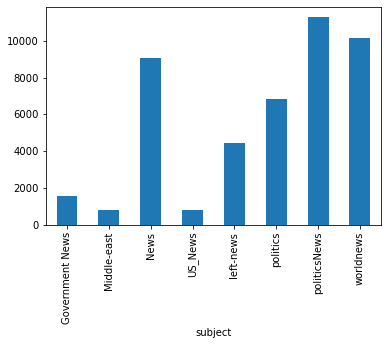

In [26]:
# How many articles per subject?
print(news_df.groupby(['subject'])['text'].count())
news_df.groupby(['subject'])['text'].count().plot(kind="bar")


<AxesSubplot:xlabel='label', ylabel='count'>

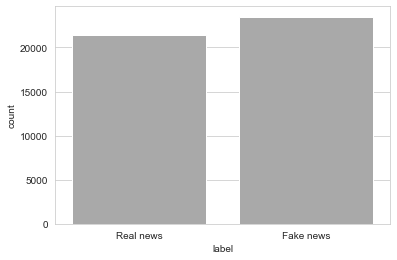

In [59]:
# Visualizing the disribution of Real and fake news
sns.countplot(x='label',data=news_df, color='Darkgrey')

The Fake news are more than Real news

## Modeling 

Tis section, I will trainig my data using `Logistic Regression model`, `Random Forest classifier`, `K-nearest neighbors`, `and naive-bayas`. 

In [30]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Defining Feature and Target 

In [31]:
X = news_df['text']#my Feature 
y = news_df['label']# my target

#### Train Test Split


Now its time to split our data into a training set and a testing set!

In [32]:
from sklearn.model_selection import train_test_split

# Lets split the data into train and test data. We will use 30% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=100)

 #### Logistic regression


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
LR = Pipeline([
    ('vector',TfidfVectorizer()),#convert text to numric structure
    ('classifier',LogisticRegression())#using Logistic regression model 
])

# training the model
LR.fit(X_train,y_train) 

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [34]:
pred_lr=LR.predict(X_test) # prediction our pred_lr

In [35]:
LR.score(X_test, y_test)# computes the accuracy score  
acc_LR= accuracy_score(y_test,pred_lr)

In [36]:
from sklearn.metrics import classification_report 
print( classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

   Fake news       0.99      0.98      0.99     11755
   Real news       0.98      0.99      0.98     10694

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_lr))

[[11570   185]
 [  143 10551]]


Confusion matrix, without normalization


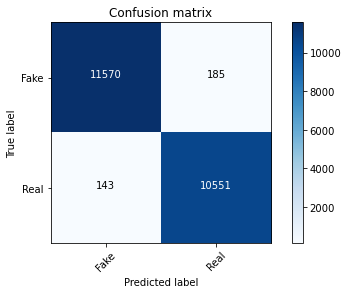

In [38]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


RFC = Pipeline([('vector',TfidfVectorizer())#convert text to numric structure
             ,('classifier',RandomForestClassifier(random_state=100))#using Random Forest model 
               ])

# training the model
RFC.fit(X_train, y_train)

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=100))])

In [40]:
RFC_pred = RFC.predict(X_test)

In [41]:
RFC.score(X_test, y_test)
acc_RFC= accuracy_score(y_test,RFC_pred)

In [42]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

   Fake news       0.99      0.99      0.99     11755
   Real news       0.99      0.98      0.98     10694

    accuracy                           0.99     22449
   macro avg       0.99      0.99      0.99     22449
weighted avg       0.99      0.99      0.99     22449



In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,RFC_pred))

[[11599   156]
 [  175 10519]]


Confusion matrix, without normalization


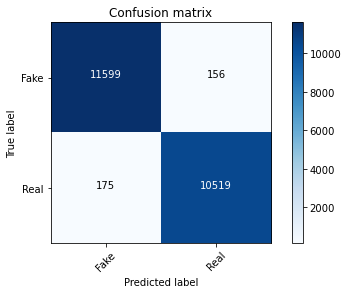

In [44]:
cm = metrics.confusion_matrix(y_test, RFC_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#### K-nearest nieghbors (KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline([
    ('vector',TfidfVectorizer()),#convert text to numric structure
    ('classifier',KNeighborsClassifier(n_neighbors=100))#using 100-nearest nieghbors model 
])

# training the model
knn.fit(X_train, y_train)

Pipeline(steps=[('vector', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=100))])

In [46]:
KNN_pred = knn.predict(X_test)

In [47]:
knn.score(y_test,KNN_pred)
acc_KNN = accuracy_score(y_test, KNN_pred)

In [48]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

   Fake news       0.53      1.00      0.69     11755
   Real news       0.98      0.01      0.03     10694

    accuracy                           0.53     22449
   macro avg       0.75      0.51      0.36     22449
weighted avg       0.74      0.53      0.37     22449



In [49]:
print(confusion_matrix(y_test,KNN_pred))

[[11752     3]
 [10549   145]]


Confusion matrix, without normalization


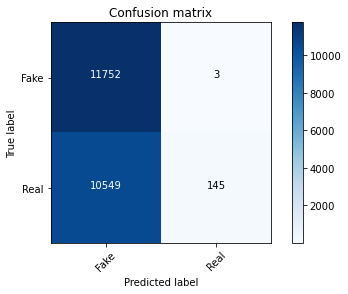

In [50]:
cm = metrics.confusion_matrix(y_test, KNN_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#### Naive-bayas Model

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
naive = Pipeline([
    ('vector',TfidfVectorizer()),#convert text to numric structure
    ('classifier',MultinomialNB()) #using naive-bayas model 
])

# training the model
naive.fit(X_train,y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [52]:
naive_pred = naive.predict(X_test)
naive.score(y_test,naive_pred)
acc_naive = accuracy_score(y_test,naive_pred)
print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

   Fake news       0.94      0.95      0.94     11755
   Real news       0.95      0.93      0.94     10694

    accuracy                           0.94     22449
   macro avg       0.94      0.94      0.94     22449
weighted avg       0.94      0.94      0.94     22449



In [53]:
print(confusion_matrix(y_test,naive_pred))

[[11186   569]
 [  768  9926]]


Confusion matrix, without normalization


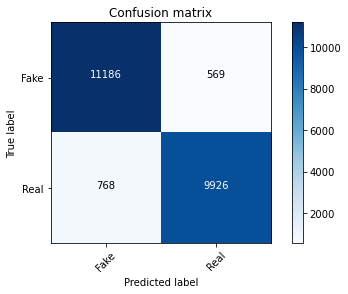

In [54]:
cm = metrics.confusion_matrix(y_test, naive_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Compirng between models

Text(0, 0.5, 'Accuracy')

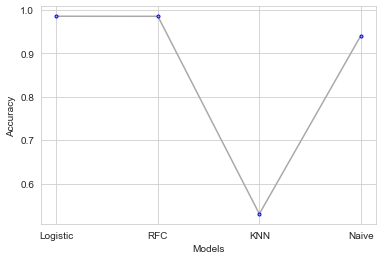

In [72]:
# Let's visualize the accuracy of all the four models
models = {
    'Logistic':acc_LR,
    'RFC':acc_RFC,
    'KNN':acc_KNN,
    'Naive':acc_naive,
}

sns.set_style('whitegrid')
plt.plot(models.keys(),models.values(),marker='.', mec='blue',color='Darkgrey')
plt.xlabel('Models')
plt.ylabel('Accuracy')

As we see , the performance of `logistic regression` and `RFC` models are the BEST!! 

## Conclusion 

This project focuses on detecting the fake news by reviewing it in two stages: EDA and modeling . In the first stage, Understanding the given dataset and helps clean up the given dataset, Handling Missing values or human error,This process is time-consuming but very effective.

The Second stage, Training our Features by using some Supervised ML approaches to classify the articles based on Text analysis. The Logistic Regression and RFC Classifier give us the best performnce, with results of accuracy 99%!!

The END!!